### Application: Background for the project presentation

In [1]:
import PIL
import os
import torch
from utils import create_folder, load_model
from classes_games import FakeGameOfLife9VarFeature

In [2]:
# check the current path
if os.getcwd().split("/")[-1] != "Presentation":
    create_folder("Presentation")

%cd Presentation
create_folder("Backgrounds")

st = load_model('Symbolic Transformer 9 to 2')
sc = load_model('Symbolic Classifier Model 2')

/home/utente/Scrivania/DS_SC/3rd_SEM/Global_Multi_Objective_Optimization/Experiments/gp_game_of_life/Presentation


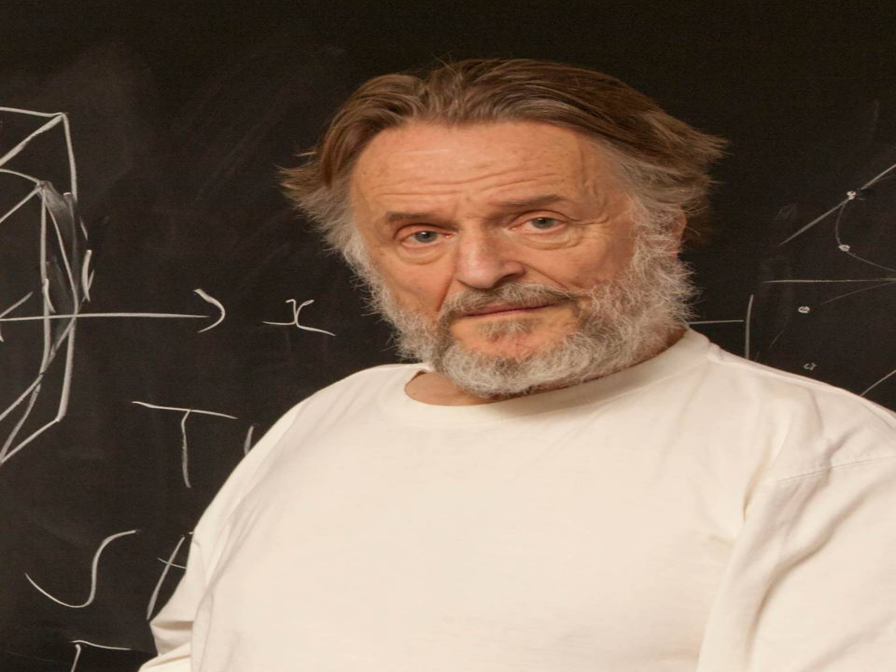

In [3]:
# import an image
im = PIL.Image.open('Images/john_conway.jpg')
x_size, y_size = 128*7, 96*7
# resize the image
im = im.resize((x_size, y_size))
im

In [4]:
# decompose the image into its RGB components
r, g, b = im.split()

In [5]:
def transparent(im, alpha=0.5):
    im = im.convert('RGBA')
    im.putalpha(int(alpha*255))
    return im

In [6]:
# convert the image to a tensor
r_tensor = torch.tensor(r.getdata(band=0), dtype=torch.float).view(y_size, x_size).T/255.0
g_tensor = torch.tensor(g.getdata(band=0), dtype=torch.float).view(y_size, x_size).T/255.0
b_tensor = torch.tensor(b.getdata(band=0), dtype=torch.float).view(y_size, x_size).T/255.0

def get_rgb(r_tensor, g_tensor, b_tensor):
    # create the image from the tensors
    im = PIL.Image.merge("RGB", (PIL.Image.fromarray(r_tensor.numpy()*255).convert('L'), PIL.Image.fromarray(g_tensor.numpy()*255).convert('L'), PIL.Image.fromarray(b_tensor.numpy()*255).convert('L')))
    # transpose the image
    im = im.transpose(PIL.Image.TRANSPOSE)
    return im

game_r = FakeGameOfLife9VarFeature(r_tensor, featurizer=st, rule=sc)
game_g = FakeGameOfLife9VarFeature(g_tensor, featurizer=st, rule=sc)
game_b = FakeGameOfLife9VarFeature(b_tensor, featurizer=st, rule=sc)

# evolve each game of life and save the images in the folder Background
steps = 100
for i in range(steps-1, 0, -1):
    game_r.step()
    game_g.step()
    game_b.step()
    im1 = get_rgb(game_r.state, game_g.state, game_b.state)
    # im1 = transparent(im1, alpha=0.5)
    im1.save(f"Backgrounds/{i//2}.png")

im = PIL.Image.open('Backgrounds/49.png')

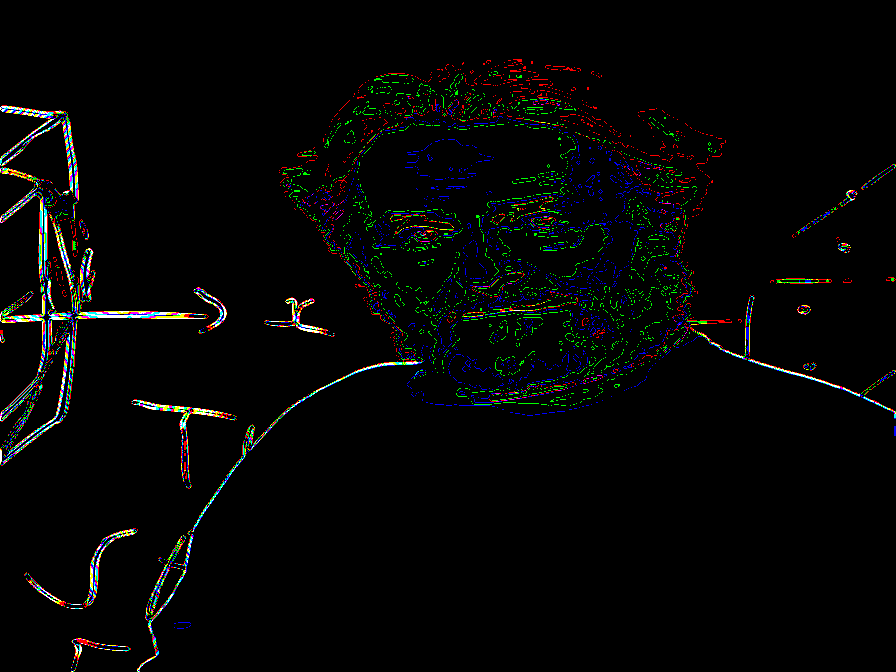

In [7]:
im